In [160]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [161]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

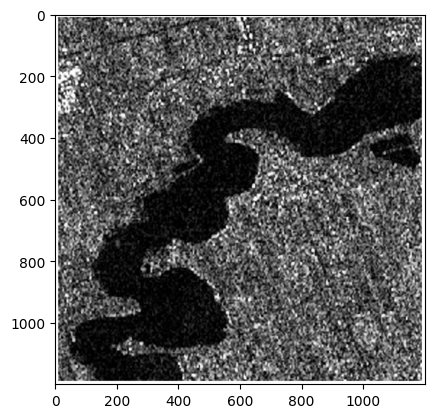

In [162]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [163]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

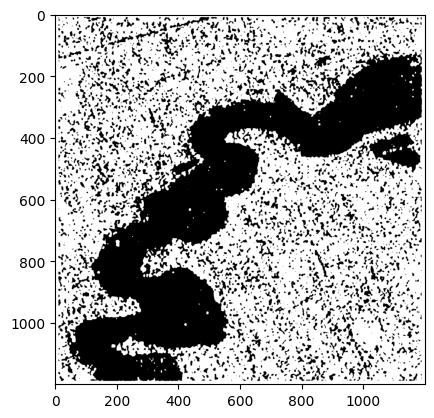

In [164]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [165]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

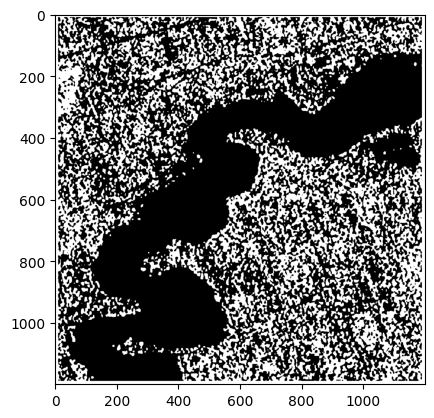

In [166]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [167]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


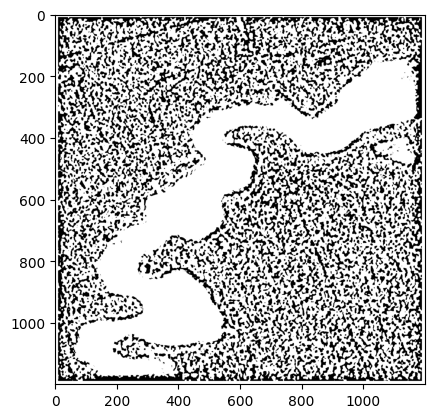

In [168]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [169]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

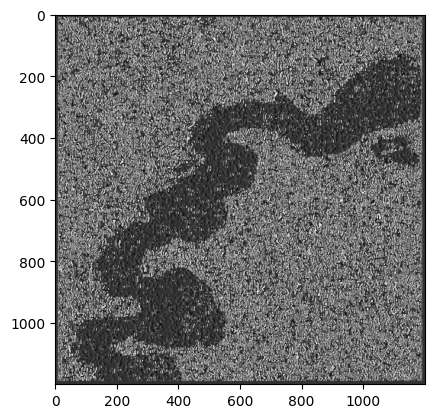

In [170]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

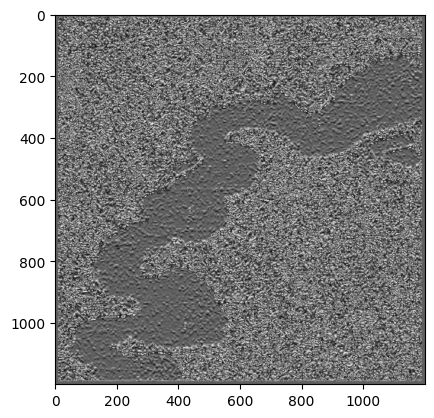

In [171]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [172]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

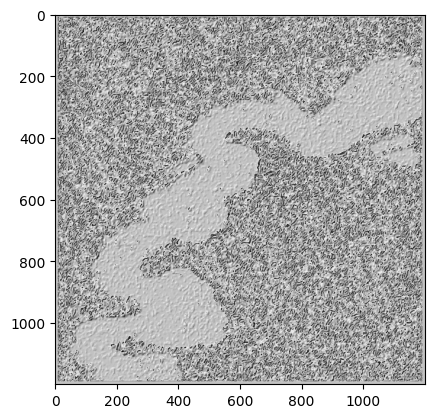

In [173]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [174]:
edges = cv2.Canny(image_gray,100,200)

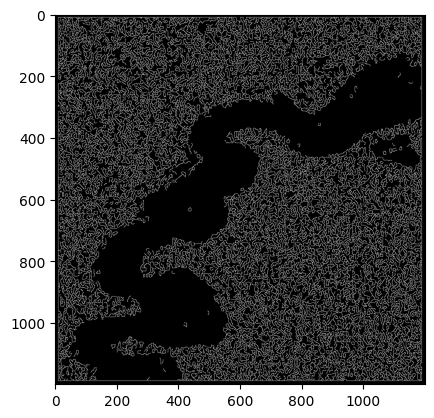

In [175]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [176]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

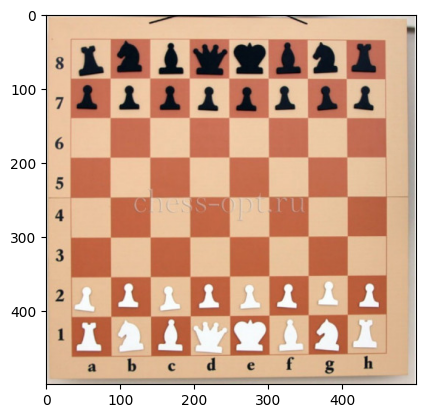

In [177]:
plt.imshow(image)

In [178]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [179]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [180]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

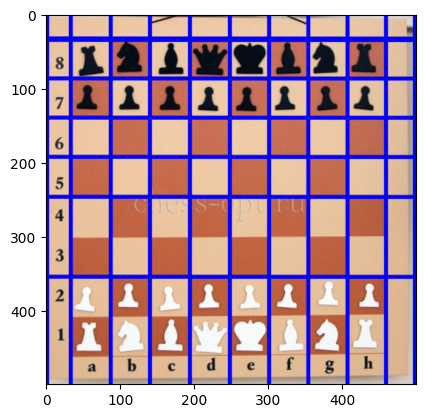

In [181]:
plt.imshow(image)

In [182]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

## 1. Для изображения sar_3.jpg найти наиболее протяженный участок

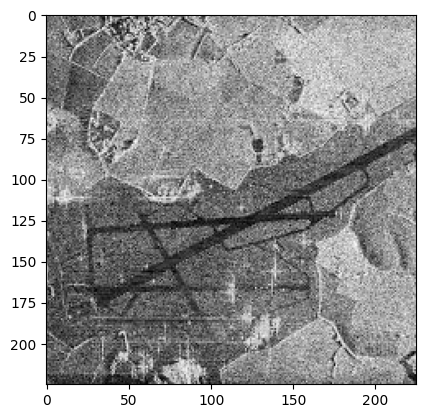

In [183]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

plt.imshow(image_gray, cmap="gray")

(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

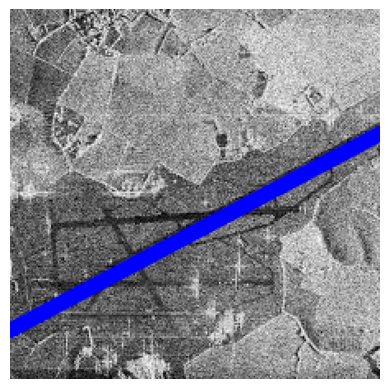

In [184]:
bin_img = copy.deepcopy(image_gray)
threshold_value = 80
bin_img[image_gray < threshold_value] = 0
bin_img[image_gray >= threshold_value] = 255

canny = cv2.Canny(bin_img, 0,250, apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 110)

if lines is not None:
    for i in range(0, len(lines)):
        longest = None
        max = 0
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max:
            max = length
            longest = (pt1, pt2)
    if longest:
        cv2.line(image, longest[0], longest[1], (0, 0, 255), 7, cv2.LINE_AA)
        
plt.imshow(image); plt.axis('off')

## 2. Исследование алгоритмов бинаризации для sar_3.jpg


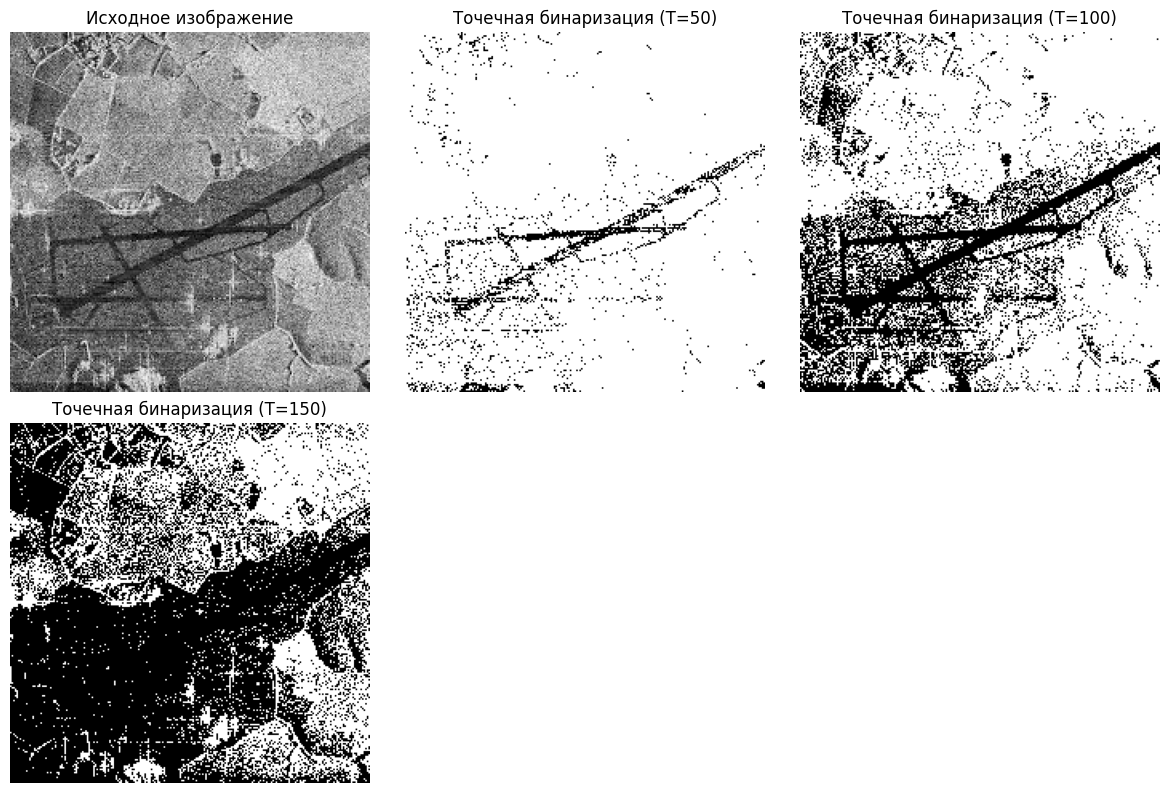

In [185]:
image_sar3 = cv2.imread('sar_3.jpg')
image_sar3_gray = cv2.cvtColor(image_sar3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

thresholds = [50, 100, 150]
for i, T in enumerate(thresholds):
    bin_img = np.zeros_like(image_sar3_gray)
    bin_img[image_sar3_gray < T] = 0
    bin_img[image_sar3_gray >= T] = 255
    
    plt.subplot(2, 3, i+2)
    plt.imshow(bin_img, cmap="gray")
    plt.title(f"Точечная бинаризация (T={T})")
    plt.axis('off')

plt.tight_layout()
plt.show()


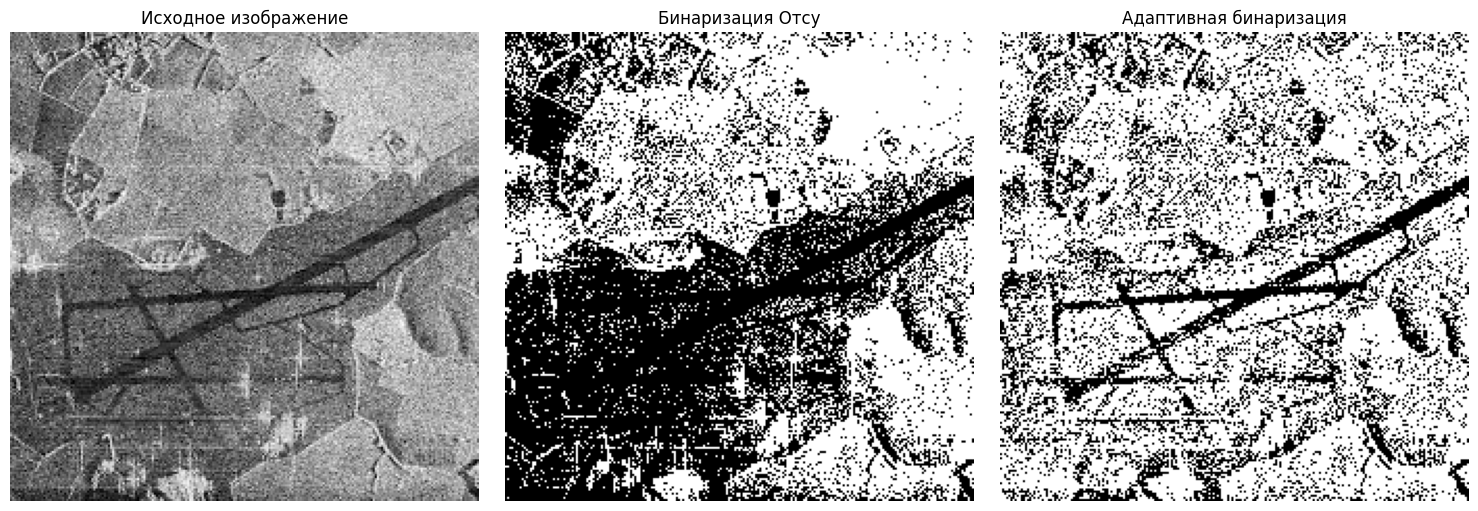

In [186]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

_, otsu_bin = cv2.threshold(image_sar3_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1, 3, 2)
plt.imshow(otsu_bin, cmap="gray")
plt.title("Бинаризация Отсу")
plt.axis('off')

adaptive_bin = cv2.adaptiveThreshold(image_sar3_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 71, 21)

plt.subplot(1, 3, 3)
plt.imshow(adaptive_bin, cmap="gray")
plt.title("Адаптивная бинаризация")
plt.axis('off')

plt.tight_layout()
plt.show()


(np.float64(-0.5), np.float64(224.5), np.float64(224.5), np.float64(-0.5))

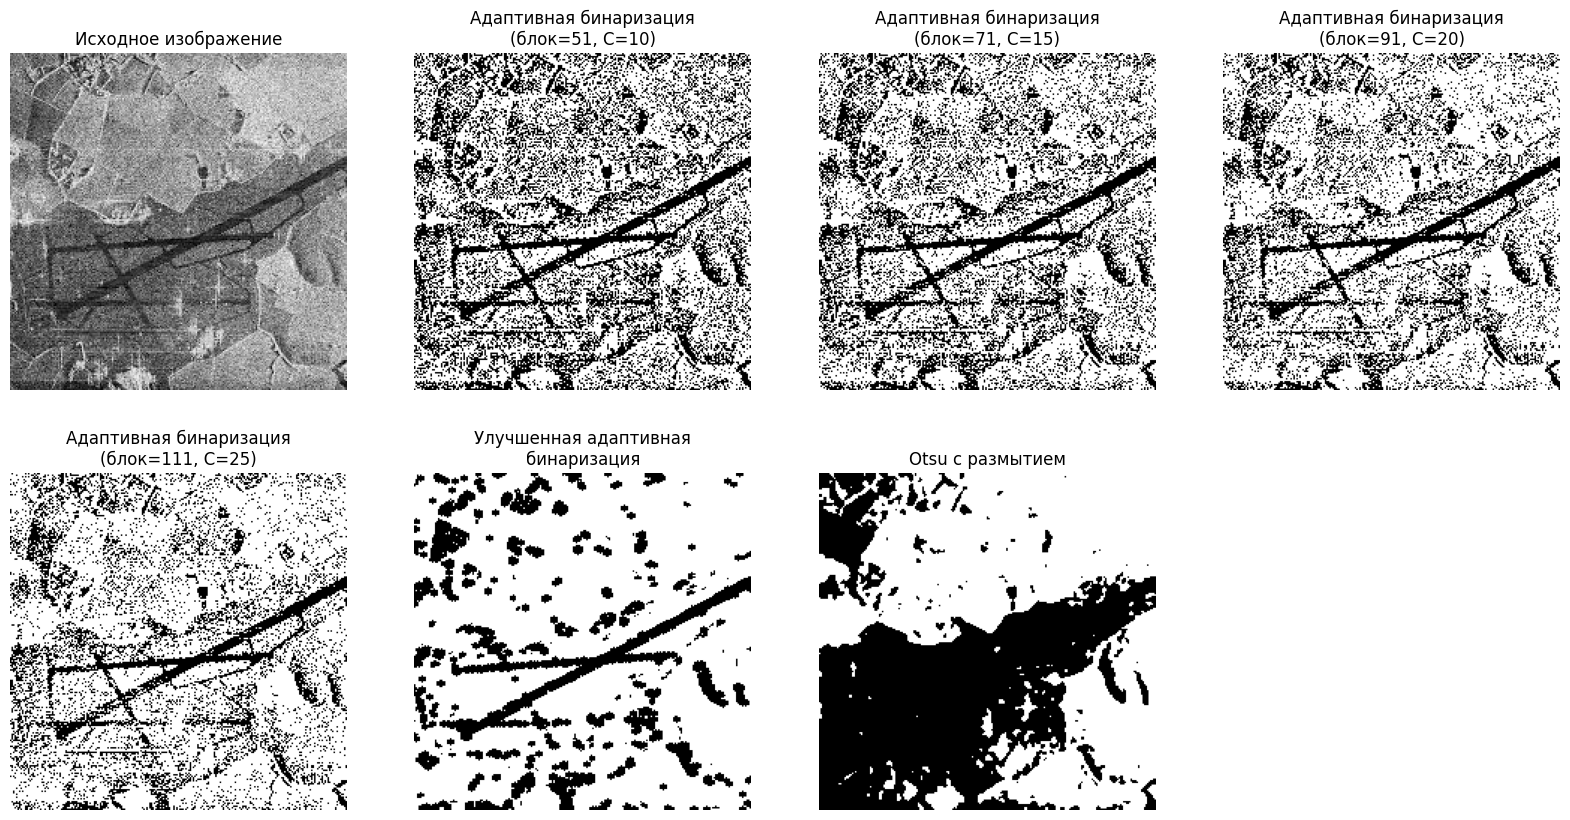

In [187]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(image_sar3_gray, cmap="gray")
plt.title("Исходное изображение")
plt.axis('off')

block_sizes = [51, 71, 91, 111]
c_values = [10, 15, 20, 25]

for i, (block_size, c_value) in enumerate(zip(block_sizes, c_values)):
    adaptive_bin = cv2.adaptiveThreshold(image_sar3_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, block_size, c_value)
    
    plt.subplot(2, 4, i+2)
    plt.imshow(adaptive_bin, cmap="gray")
    plt.title(f"Адаптивная бинаризация\n(блок={block_size}, C={c_value})")
    plt.axis('off')


plt.subplot(2, 4, 6)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
morph = cv2.morphologyEx(image_sar3_gray, cv2.MORPH_CLOSE, kernel)
adaptive_improved = cv2.adaptiveThreshold(morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                         cv2.THRESH_BINARY, 71, 15)
plt.imshow(adaptive_improved, cmap="gray")
plt.title("Улучшенная адаптивная\nбинаризация")
plt.axis('off')

plt.subplot(2, 4, 7)
blurred = cv2.GaussianBlur(image_sar3_gray, (5, 5), 0)
_, otsu_improved = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_improved, cmap="gray")
plt.title("Otsu с размытием")
plt.axis('off')
